# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import openweathermapy.core as owm
import openweathermapy as ow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
from api_keys import api_key
api_key = '4a49bd40f96f0c289cd29b0a571ec887'
# Import API key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"units": "metric", "appid": api_key}
def get_data(city):
    """ This function is used in adding exceptions to any city whose data is not found
    """
    try:
        data = owm.get_current(city, **settings)
        print(f"city number: {data['id']}, city name: {data['name']}")
        return data
    except (KeyError, urllib.error.HTTPError):
        print(f"Error : No data available for {city}")
        return None
#All_cities = [get_data(city) for city in cities]


In [4]:
All_cities = [get_data(city) for city in cities]
valid_cities = [d for d in All_cities if(d is not None)]
#len(All_cities)
#print(len(valid_cities))
#print(valid_cities[0])
"""
for city in valid_cities:
    try:
        print(f"city number: {city['id']}, city name: {city['name']}")
    except:
        print ("Error")
"""
print(len(valid_cities))

city number: 2173911, city name: Broken Hill
city number: 4030556, city name: Rikitea
city number: 6165406, city name: Thompson
city number: 1737486, city name: Bintulu
city number: 2509553, city name: Villanueva de la Serena
city number: 2290956, city name: Bouake
Error : No data available for belushya guba
city number: 1861416, city name: Ishigaki
city number: 3369157, city name: Cape Town
city number: 3833367, city name: Ushuaia
city number: 1734634, city name: Tambun
city number: 2126199, city name: Cherskiy
city number: 3471451, city name: Arraial do Cabo
city number: 3094086, city name: Kwidzyn
city number: 1259385, city name: Port Blair
city number: 2110227, city name: Butaritari
Error : No data available for grand river south east
city number: 2175403, city name: Bluff
city number: 3692073, city name: Santiago de Cao
city number: 3831208, city name: Qaanaaq
city number: 6201424, city name: Mataura
city number: 344979, city name: Lebu
city number: 4036284, city name: Alofi
city 

city number: 3141667, city name: Roald
city number: 522775, city name: Nelidovo
city number: 6185377, city name: Yellowknife
city number: 176758, city name: Kaputa
city number: 496381, city name: Severnoye
city number: 3037456, city name: Saint-Joseph
city number: 5975004, city name: High Level
city number: 6148373, city name: Sioux Lookout
city number: 2126123, city name: Chokurdakh
city number: 4034551, city name: Faanui
city number: 3469058, city name: Taguatinga
city number: 2214433, city name: Nalut
city number: 3141310, city name: Rorvik
city number: 556268, city name: Ostrovnoy
city number: 3645532, city name: Ciudad Bolivar
city number: 3471609, city name: Areia Branca
city number: 2077895, city name: Alice Springs
Error : No data available for bengkalis
city number: 3386213, city name: Touros
city number: 5880568, city name: Bethel
city number: 3435038, city name: Dolores
city number: 2374583, city name: Bubaque
Error : No data available for illoqqortoormiut
city number: 61580

city number: 4500920, city name: Brigantine
Error : No data available for anar darreh
Error : No data available for falealupo
city number: 1691355, city name: Sabang
city number: 3421319, city name: Nuuk
city number: 933696, city name: Kalamare
city number: 7626384, city name: Hovd
Error : No data available for inderborskiy
city number: 2448024, city name: Seydi
city number: 608872, city name: Makat
city number: 1215502, city name: Banda Aceh
city number: 2013727, city name: Vanavara
city number: 3451138, city name: Rio Grande
city number: 704839, city name: Koryukivka
city number: 2122389, city name: Ossora
city number: 462169, city name: Zolotukhino
city number: 677712, city name: Gaiseni
city number: 1808534, city name: Helong
city number: 3443061, city name: Chuy
Error : No data available for tuggurt
Error : No data available for ondorhaan
city number: 2013465, city name: Verkhoyansk
city number: 6014443, city name: Lac du Bonnet
city number: 286245, city name: Sur
city number: 145

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat", "coord.lon","main.temp_max","wind.speed"]
data = [response(*summary) for response in valid_cities]
All = pd.DataFrame(data)
All.columns = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
All.to_csv('out.csv')
All.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

In [6]:
All

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Broken Hill,0,AU,1541883446,46,-31.97,141.45,15.38,2.18
1,Rikitea,68,PF,1541883315,100,-23.12,-134.97,21.48,5.61
2,Thompson,75,CA,1541880000,72,55.74,-97.86,-9.00,3.10
3,Bintulu,75,MY,1541880000,94,3.17,113.03,25.00,1.23
4,Villanueva de la Serena,92,ES,1541883447,96,38.97,-5.80,14.98,4.86
5,Bouake,75,CI,1541880000,94,7.69,-5.02,25.00,1.00
6,Ishigaki,92,JP,1541883448,100,24.34,124.16,22.36,4.81
7,Cape Town,0,ZA,1541880000,68,-33.93,18.42,20.00,7.20
8,Ushuaia,40,AR,1541880000,49,-54.81,-68.31,9.00,13.90
9,Tambun,75,MY,1541880000,88,4.62,101.14,26.00,1.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

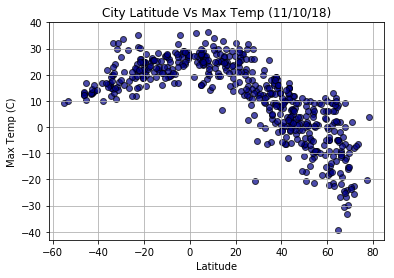

In [7]:
x_axis = All["Lat"]
plt.scatter(x_axis, All["Max Temp"], marker="o", facecolors="darkblue", edgecolors="black",
             alpha=0.7)
plt.title("City Latitude Vs Max Temp (11/10/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid()
# Save the figure
plt.savefig("CityLatitude_Vs_MaxTemp.png")

#### Latitude vs. Humidity Plot

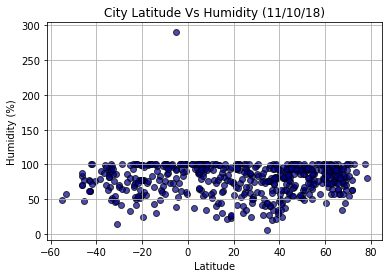

In [8]:
plt.scatter(x_axis, All["Humidity"], marker="o", facecolors="darkblue", edgecolors="black",
             alpha=0.7)
plt.title("City Latitude Vs Humidity (11/10/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
plt.savefig("CityLatitude_Vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

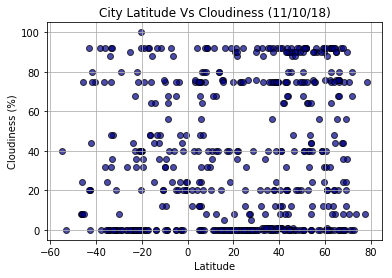

In [9]:
plt.scatter(x_axis, All["Cloudiness"], marker="o", facecolors="darkblue", edgecolors="black",
          alpha=0.7)
plt.title("City Latitude Vs Cloudiness (11/10/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("CityLatitude_Vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

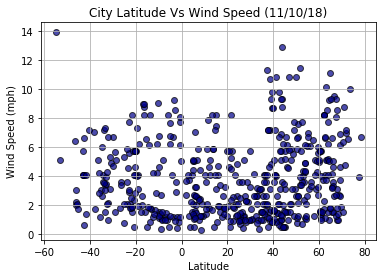

In [10]:
plt.scatter(x_axis, All["Wind Speed"], marker="o", facecolors="darkblue", edgecolors="black",
             alpha=0.7)
plt.title("City Latitude Vs Wind Speed (11/10/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
# Save the figure
plt.savefig("CityLatitude_Vs_WindSpeed.png")